# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.5 tensorflow-gpu==2.5 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.left_hand_landmarks.landmark)

21

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

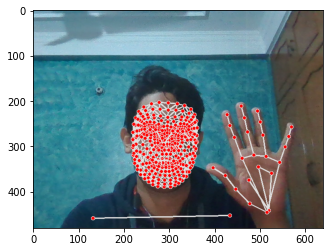

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks :
    print("SUCCESS")
else :np.zeros(1404)


SUCCESS


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.45144987,  0.61814672, -1.26791596, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [19]:
np.save('0', result_test)

In [20]:
np.load('0.npy')

array([ 0.45144987,  0.61814672, -1.26791596, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [28]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [29]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'actions' is not defined

In [23]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [24]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(90, 30, 1662)

In [34]:
np.array(labels).shape

(90,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(90, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [44]:
res = [.7, 0.2, 0.1]

In [45]:
actions[np.argmax(res)]

'hello'

In [46]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [47]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 220ms/step - loss: 1.1108 - categorical_accuracy: 0.4235
Epoch 2/2000
3/3 [==============================] - 0s 56ms/step - loss: 3.3120 - categorical_accuracy: 0.2824
Epoch 3/2000
3/3 [==============================] - 0s 59ms/step - loss: 16.7458 - categorical_accuracy: 0.2000
Epoch 4/2000
3/3 [==============================] - 0s 56ms/step - loss: 6.6717 - categorical_accuracy: 0.4118
Epoch 5/2000
3/3 [==============================] - 0s 56ms/step - loss: 18.6418 - categorical_accuracy: 0.3882
Epoch 6/2000
3/3 [==============================] - 0s 55ms/step - loss: 37.0295 - categorical_accuracy: 0.2941
Epoch 7/2000
3/3 [==============================] - 0s 54ms/step - loss: 15.2274 - categorical_accuracy: 0.3176
Epoch 8/2000
3/3 [==============================] - 0s 55ms/step - loss: 23.7404 - categorical_accuracy: 0.3882
Epoch 9/2000
3/3 [==============================] - 0s 54ms/step - loss: 24.4990 - categorical_accuracy: 0

3/3 [==============================] - 0s 61ms/step - loss: 12.1715 - categorical_accuracy: 0.3882
Epoch 146/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.7982 - categorical_accuracy: 0.2588
Epoch 147/2000
3/3 [==============================] - 0s 60ms/step - loss: 5.5670 - categorical_accuracy: 0.2824
Epoch 148/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.2170 - categorical_accuracy: 0.3882
Epoch 149/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.0892 - categorical_accuracy: 0.4471
Epoch 150/2000
3/3 [==============================] - 0s 63ms/step - loss: 6.6316 - categorical_accuracy: 0.3882
Epoch 151/2000
3/3 [==============================] - 0s 60ms/step - loss: 16.0217 - categorical_accuracy: 0.3412
Epoch 152/2000
3/3 [==============================] - 0s 54ms/step - loss: 9.1759 - categorical_accuracy: 0.3529
Epoch 153/2000
3/3 [==============================] - 0s 53ms/step - loss: 7.9681 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 63ms/step - loss: 1.7381 - categorical_accuracy: 0.3529
Epoch 290/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.3035 - categorical_accuracy: 0.4235
Epoch 291/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.5314 - categorical_accuracy: 0.4118
Epoch 292/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.8581 - categorical_accuracy: 0.3294
Epoch 293/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.1887 - categorical_accuracy: 0.3176
Epoch 294/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.6041 - categorical_accuracy: 0.4000
Epoch 295/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.6356 - categorical_accuracy: 0.4000
Epoch 296/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.7644 - categorical_accuracy: 0.3059
Epoch 297/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.2692 - categorical_accuracy: 0.364

3/3 [==============================] - 0s 56ms/step - loss: 1.1086 - categorical_accuracy: 0.4941
Epoch 434/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.0377 - categorical_accuracy: 0.4824
Epoch 435/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1354 - categorical_accuracy: 0.3765
Epoch 436/2000
3/3 [==============================] - 0s 51ms/step - loss: 1.5341 - categorical_accuracy: 0.3294
Epoch 437/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.1788 - categorical_accuracy: 0.3294
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.3842 - categorical_accuracy: 0.4824
Epoch 439/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.6212 - categorical_accuracy: 0.3882
Epoch 440/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.2990 - categorical_accuracy: 0.4471
Epoch 441/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.4136 - categorical_accuracy: 0.388

3/3 [==============================] - 0s 53ms/step - loss: 0.8484 - categorical_accuracy: 0.6118
Epoch 578/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.8806 - categorical_accuracy: 0.6000
Epoch 579/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.7941 - categorical_accuracy: 0.6118
Epoch 580/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.5827 - categorical_accuracy: 0.7529
Epoch 581/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.5464 - categorical_accuracy: 0.7176
Epoch 582/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.6239 - categorical_accuracy: 0.7176
Epoch 583/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.8951 - categorical_accuracy: 0.6000
Epoch 584/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.6527 - categorical_accuracy: 0.7059
Epoch 585/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.6308 - categorical_accuracy: 0.705

3/3 [==============================] - 0s 55ms/step - loss: 1.3672 - categorical_accuracy: 0.4235
Epoch 722/2000
3/3 [==============================] - 0s 53ms/step - loss: 1.3428 - categorical_accuracy: 0.4471
Epoch 723/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.5934 - categorical_accuracy: 0.2941
Epoch 724/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0343 - categorical_accuracy: 0.4118
Epoch 725/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1910 - categorical_accuracy: 0.4000
Epoch 726/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1257 - categorical_accuracy: 0.4000
Epoch 727/2000
3/3 [==============================] - 0s 55ms/step - loss: 1.0510 - categorical_accuracy: 0.4941
Epoch 728/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.1651 - categorical_accuracy: 0.4706
Epoch 729/2000
3/3 [==============================] - 0s 54ms/step - loss: 1.0503 - categorical_accuracy: 0.423

3/3 [==============================] - 0s 54ms/step - loss: 0.7321 - categorical_accuracy: 0.6118
Epoch 866/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8542 - categorical_accuracy: 0.6000
Epoch 867/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.9192 - categorical_accuracy: 0.6235
Epoch 868/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.8746 - categorical_accuracy: 0.5529
Epoch 869/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7275 - categorical_accuracy: 0.6941
Epoch 870/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.7072 - categorical_accuracy: 0.6118
Epoch 871/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5561 - categorical_accuracy: 0.8000
Epoch 872/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6837 - categorical_accuracy: 0.6235
Epoch 873/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.6503 - categorical_accuracy: 0.635

3/3 [==============================] - 0s 61ms/step - loss: 0.3727 - categorical_accuracy: 0.8471
Epoch 1010/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3538 - categorical_accuracy: 0.8588
Epoch 1011/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.3656 - categorical_accuracy: 0.8353
Epoch 1012/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3476 - categorical_accuracy: 0.8353
Epoch 1013/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.3138 - categorical_accuracy: 0.8588
Epoch 1014/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3145 - categorical_accuracy: 0.8706
Epoch 1015/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.2921 - categorical_accuracy: 0.8824
Epoch 1016/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3166 - categorical_accuracy: 0.8471
Epoch 1017/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3061 - categorical_accurac

3/3 [==============================] - 0s 64ms/step - loss: 0.2460 - categorical_accuracy: 0.9059
Epoch 1082/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2614 - categorical_accuracy: 0.9294
Epoch 1083/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2934 - categorical_accuracy: 0.8941
Epoch 1084/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.2904 - categorical_accuracy: 0.8941
Epoch 1085/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.2544 - categorical_accuracy: 0.8824
Epoch 1086/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2850 - categorical_accuracy: 0.8824
Epoch 1087/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.2762 - categorical_accuracy: 0.8824
Epoch 1088/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.3001 - categorical_accuracy: 0.8706
Epoch 1089/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2916 - categorical_accurac

3/3 [==============================] - 0s 53ms/step - loss: 0.2209 - categorical_accuracy: 0.9176
Epoch 1154/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2736 - categorical_accuracy: 0.8824
Epoch 1155/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.2764 - categorical_accuracy: 0.8706
Epoch 1156/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2640 - categorical_accuracy: 0.8706
Epoch 1157/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2088 - categorical_accuracy: 0.9059
Epoch 1158/2000
3/3 [==============================] - 0s 51ms/step - loss: 0.3300 - categorical_accuracy: 0.8471
Epoch 1159/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3659 - categorical_accuracy: 0.8588
Epoch 1160/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.3470 - categorical_accuracy: 0.8471
Epoch 1161/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.2608 - categorical_accurac

3/3 [==============================] - 0s 56ms/step - loss: 0.4935 - categorical_accuracy: 0.8353
Epoch 1226/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3297 - categorical_accuracy: 0.8471
Epoch 1227/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4777 - categorical_accuracy: 0.8235
Epoch 1228/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2511 - categorical_accuracy: 0.8824
Epoch 1229/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4120 - categorical_accuracy: 0.8235
Epoch 1230/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.5811 - categorical_accuracy: 0.8118
Epoch 1231/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2758 - categorical_accuracy: 0.9059
Epoch 1232/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.3192 - categorical_accuracy: 0.8471
Epoch 1233/2000
3/3 [==============================] - 0s 69ms/step - loss: 0.9089 - categorical_accurac

3/3 [==============================] - 0s 56ms/step - loss: 0.3129 - categorical_accuracy: 0.8706
Epoch 1298/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3083 - categorical_accuracy: 0.8706
Epoch 1299/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.4363 - categorical_accuracy: 0.8353
Epoch 1300/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.4372 - categorical_accuracy: 0.8353
Epoch 1301/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1979 - categorical_accuracy: 0.9176
Epoch 1302/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1540 - categorical_accuracy: 0.9529
Epoch 1303/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1587 - categorical_accuracy: 0.9412
Epoch 1304/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1602 - categorical_accuracy: 0.9529
Epoch 1305/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.2105 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 0.1494 - categorical_accuracy: 0.9412
Epoch 1370/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1325 - categorical_accuracy: 0.9412
Epoch 1371/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1179 - categorical_accuracy: 0.9647
Epoch 1372/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1200 - categorical_accuracy: 0.9529
Epoch 1373/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.1302 - categorical_accuracy: 0.9529
Epoch 1374/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1451 - categorical_accuracy: 0.9529
Epoch 1375/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.1198 - categorical_accuracy: 0.9647
Epoch 1376/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1421 - categorical_accuracy: 0.9647
Epoch 1377/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.1302 - categorical_accurac

3/3 [==============================] - 0s 54ms/step - loss: 0.1533 - categorical_accuracy: 0.9412
Epoch 1442/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1353 - categorical_accuracy: 0.9529
Epoch 1443/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1976 - categorical_accuracy: 0.9412
Epoch 1444/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.2959 - categorical_accuracy: 0.8941
Epoch 1445/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4416 - categorical_accuracy: 0.8471
Epoch 1446/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.4038 - categorical_accuracy: 0.8706
Epoch 1447/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2757 - categorical_accuracy: 0.9176
Epoch 1448/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2031 - categorical_accuracy: 0.9294
Epoch 1449/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2213 - categorical_accurac

3/3 [==============================] - 0s 55ms/step - loss: 0.3956 - categorical_accuracy: 0.8941
Epoch 1514/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.2502 - categorical_accuracy: 0.9059
Epoch 1515/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3423 - categorical_accuracy: 0.8471
Epoch 1516/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.6774 - categorical_accuracy: 0.8118
Epoch 1517/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.4620 - categorical_accuracy: 0.8235
Epoch 1518/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4317 - categorical_accuracy: 0.8353
Epoch 1519/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.7441 - categorical_accuracy: 0.7882
Epoch 1520/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4571 - categorical_accuracy: 0.8471
Epoch 1521/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.5113 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.1135 - categorical_accuracy: 0.9647
Epoch 1586/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1518 - categorical_accuracy: 0.9412
Epoch 1587/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1852 - categorical_accuracy: 0.9176
Epoch 1588/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1439 - categorical_accuracy: 0.9176
Epoch 1589/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2730 - categorical_accuracy: 0.9059
Epoch 1590/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.2224 - categorical_accuracy: 0.9059
Epoch 1591/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1900 - categorical_accuracy: 0.9176
Epoch 1592/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1372 - categorical_accuracy: 0.9647
Epoch 1593/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.1910 - categorical_accurac

3/3 [==============================] - 0s 59ms/step - loss: 0.1424 - categorical_accuracy: 0.9412
Epoch 1658/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.1380 - categorical_accuracy: 0.9529
Epoch 1659/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1185 - categorical_accuracy: 0.9647
Epoch 1660/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.1096 - categorical_accuracy: 0.9647
Epoch 1661/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0897 - categorical_accuracy: 0.9765
Epoch 1662/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1173 - categorical_accuracy: 0.9647
Epoch 1663/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1070 - categorical_accuracy: 0.9765
Epoch 1664/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0820 - categorical_accuracy: 0.9765
Epoch 1665/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0938 - categorical_accurac

3/3 [==============================] - 0s 58ms/step - loss: 0.2361 - categorical_accuracy: 0.9176
Epoch 1730/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1387 - categorical_accuracy: 0.9529
Epoch 1731/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1312 - categorical_accuracy: 0.9412
Epoch 1732/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0978 - categorical_accuracy: 0.9647
Epoch 1733/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.1088 - categorical_accuracy: 0.9412
Epoch 1734/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1098 - categorical_accuracy: 0.9529
Epoch 1735/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1082 - categorical_accuracy: 0.9412
Epoch 1736/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0929 - categorical_accuracy: 0.9765
Epoch 1737/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0900 - categorical_accurac

3/3 [==============================] - 0s 57ms/step - loss: 0.2333 - categorical_accuracy: 0.8706
Epoch 1802/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1946 - categorical_accuracy: 0.9176
Epoch 1803/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1838 - categorical_accuracy: 0.9294
Epoch 1804/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.1454 - categorical_accuracy: 0.9412
Epoch 1805/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1363 - categorical_accuracy: 0.9412
Epoch 1806/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1483 - categorical_accuracy: 0.9412
Epoch 1807/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1693 - categorical_accuracy: 0.9412
Epoch 1808/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1635 - categorical_accuracy: 0.9412
Epoch 1809/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1448 - categorical_accurac

3/3 [==============================] - 0s 54ms/step - loss: 0.0868 - categorical_accuracy: 0.9765
Epoch 1874/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0919 - categorical_accuracy: 0.9647
Epoch 1875/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.0992 - categorical_accuracy: 0.9529
Epoch 1876/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.1020 - categorical_accuracy: 0.9647
Epoch 1877/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.1004 - categorical_accuracy: 0.9647
Epoch 1878/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0789 - categorical_accuracy: 0.9882
Epoch 1879/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.1215 - categorical_accuracy: 0.9529
Epoch 1880/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.2581 - categorical_accuracy: 0.9176
Epoch 1881/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1309 - categorical_accurac

3/3 [==============================] - 0s 54ms/step - loss: 0.1266 - categorical_accuracy: 0.9412
Epoch 1946/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1382 - categorical_accuracy: 0.9529
Epoch 1947/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.1296 - categorical_accuracy: 0.9529
Epoch 1948/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0938 - categorical_accuracy: 0.9765
Epoch 1949/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.2087 - categorical_accuracy: 0.9059
Epoch 1950/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.3976 - categorical_accuracy: 0.9176
Epoch 1951/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3319 - categorical_accuracy: 0.9059
Epoch 1952/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4074 - categorical_accuracy: 0.8588
Epoch 1953/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.5672 - categorical_accurac

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [83]:
#SAVING THE MODEL FOR USE NEXT TIME 
model_json=model.to_json()
with open("model1.json","w") as json_file:
     json_file.write(model_json)
# files.download("model1.json")
model.save('weights.h5')
# files.download('weights.h5')

In [84]:
# Rendering the saved model 
from keras.models import model_from_json
from keras.preprocessing import image
model = model_from_json(open("model1.json", "r").read())
model.load_weights('weights.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [49]:
res = model.predict(X_test)

In [50]:
actions[np.argmax(res[4])]

'thanks'

In [51]:
actions[np.argmax(y_test[4])]

'thanks'

# 9. Save Weights

In [52]:
model.save('action.h5')

In [53]:
## del model

In [54]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [59]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [73]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

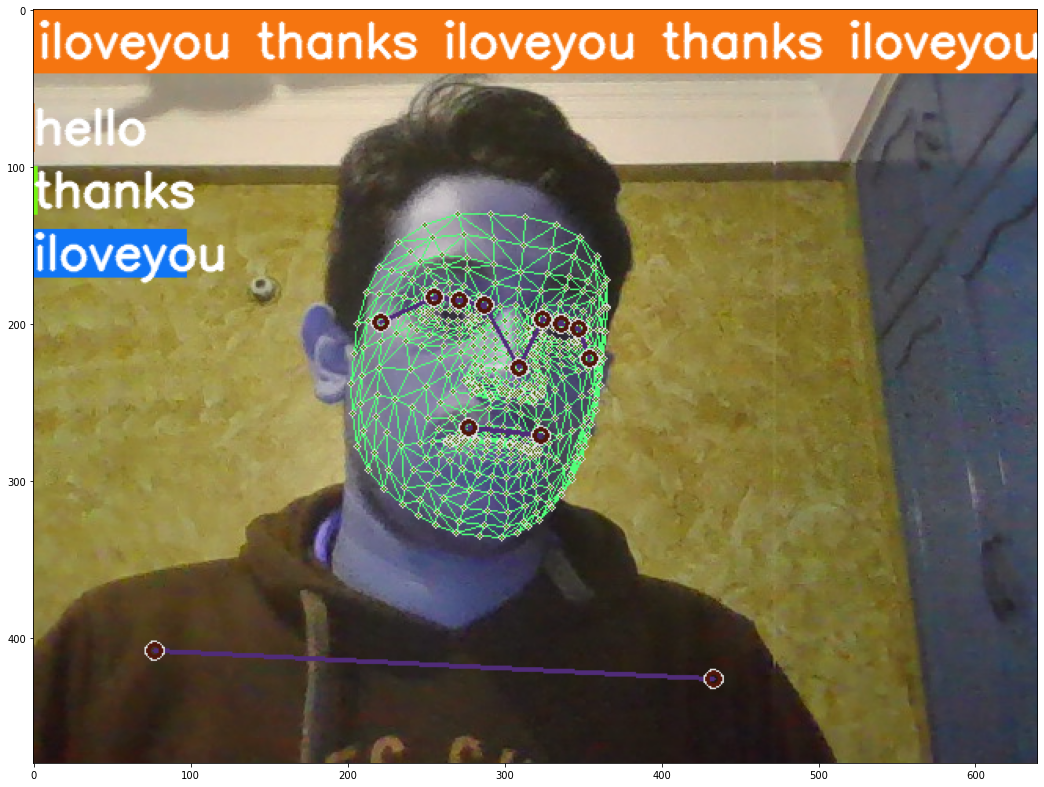

In [74]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [75]:
sequence.reverse()

In [76]:
len(sequence)

30

In [77]:
sequence.append('def')

In [78]:
sequence.reverse()

In [79]:
sequence[-30:]

[array([ 0.46132547,  0.47946045, -0.76441222, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46204454,  0.47964299, -0.78239906, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46234298,  0.47982851, -0.79164094, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46313199,  0.47992882, -0.79838049, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46361098,  0.48006549, -0.83153474, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.4628107 ,  0.47653264, -1.22065759, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46192628,  0.47121236, -1.30178916, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.4634831 ,  0.46604902, -1.28198588, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46366167,  0.45167831, -1.21896005, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.46441659,  0.44489235, -1.2642405 , ...,  0.        ,
         0.        ,  0.  

In [82]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'me

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solutio

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<cl

<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOu

In [69]:
cap.release()
cv2.destroyAllWindows()

In [70]:
res[np.argmax(res)] > threshold

True

In [72]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[2.7033979e-01, 1.2813202e-05, 7.2964740e-01]], dtype=float32)